# IA048 - Aprendizado de Máquina 
## Exercício de Fixação de Conceitos (EFC) 3 - 2s2020

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk    
from sklearn import preprocessing
import numpy as np
import seaborn as sns 

In [2]:
data = pd.read_csv("dados_diabetes.csv")

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.info()
data["Outcome"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64

As one may see from the last execution, our dataset is not balanced since we have 500 non-diabetics and 268 diabetics.

In [7]:
diabet = data.loc[data["Outcome"] == 1]
n_diabet = data.loc[data["Outcome"] == 0]

In [8]:
features = diabet.columns.tolist()

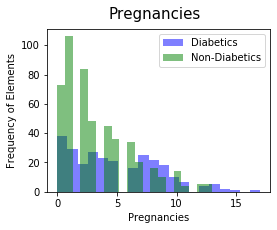

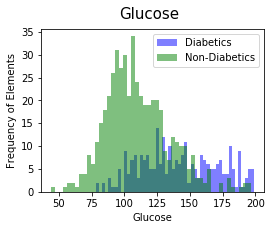

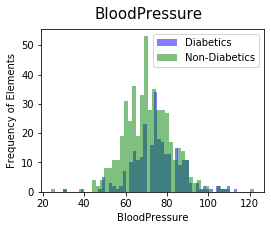

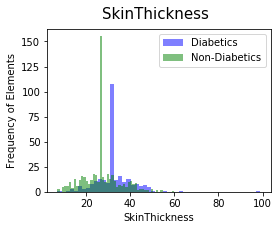

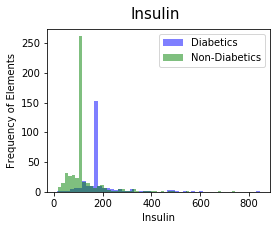

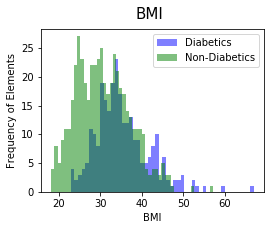

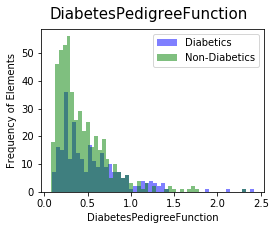

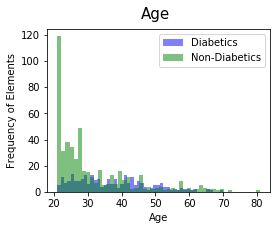

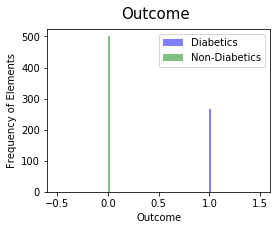

In [9]:
for k in features:
    plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
    if (k == "Pregnancies"):
        plt.hist(diabet[k],bins=20,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=20,alpha=0.5,label='Non-Diabetics',color='Green')
    else:
        plt.hist(diabet[k],bins=50,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=50,alpha=0.5,label='Non-Diabetics',color='Green')
    plt.legend(loc='upper right')
    plt.suptitle(k, fontsize = 15)
    plt.xlabel(k)
    plt.ylabel("Frequency of Elements")
    plt.show()

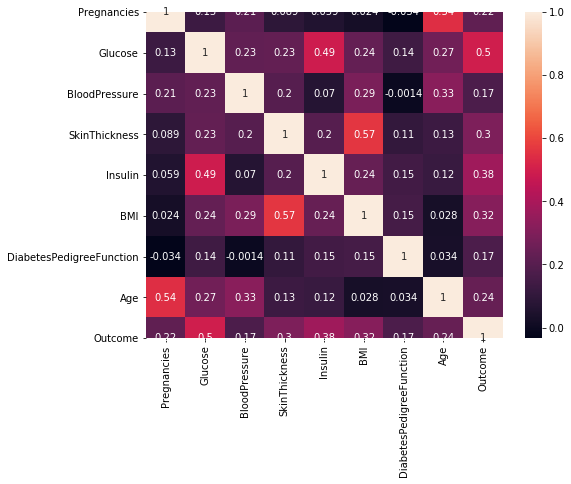

In [15]:
data_corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data_corr, annot = True)
plt.show()

In [16]:
# Normalizing our data with the MinMax Scaler
data_np = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_np_norm = min_max_scaler.fit_transform(data_np)
data_norm = pd.DataFrame(data_np_norm, columns= data.columns)

In [17]:
# Separating the labels from the features
label = data_norm['Outcome']
x = data_norm.drop(columns=['Outcome'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,label,stratify=label,test_size=0.2)

In [19]:
# Let's observe if the train test stratified split worked well, we can verify if the proportion of samples
# in the class 0 and 1 are still around the same from the original data
display(y_train.value_counts())
display(y_test.value_counts())

0.0    400
1.0    214
Name: Outcome, dtype: int64

0.0    100
1.0     54
Name: Outcome, dtype: int64

In [20]:
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

In [21]:
#Now that we pre-treated our data we may implement our Deep Learning models
import torch as th
import torch.nn as nn

X_train = th.from_numpy(X_train).float()
X_test = th.from_numpy(X_test).float()
y_train = th.from_numpy(y_train).float()
y_test = th.from_numpy(y_test).float()


In [22]:
display(y_train.shape)
display(y_test.shape)
display(X_train.shape)
display(X_test.shape)

torch.Size([614])

torch.Size([154])

torch.Size([614, 8])

torch.Size([154, 8])

In [141]:
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

In [39]:
# Let's use a mini-batching with SGD to train our model
from sklearn.metrics import accuracy_score

def train(model, optmizer, loss_fn, epochs, batch_size, X_train, y_train, X_test, y_test, verbose=False):
    # Mini-batching and shuffling
    Ntrain = X_train.shape[0]
    Nvalid = X_test.shape[0]
    idx = np.arange(Ntrain)
    # We need to 'break' the training dataset in multiple batches
    nbatch = int(Ntrain/batch_size)

    train_losses, valid_losses, valid_acc = [],[],[]

    for epoch in range(epochs):

        np.random.shuffle(idx)
        running_loss = 0
        # Number of samples in the next loop
        totaln = 0

        for bat in range(nbatch):

            ids = idx[bat*batch_size:(bat+1)*batch_size]
            features = X_train[ids]
            labels = y_train[ids]
            totaln = totaln + labels.shape[0]

            optimizer.zero_grad()
            model_application = model(features)
            loss = loss_fn(model_application,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        
        accuracy = 0
        valid_loss = 0
        with th.no_grad():
            features = X_test
            labels = y_test
            model_application = model(features)
            valid_loss = loss_fn(model_application, labels)
            y_pred = []

            for k in range(len(model_application)):
                if (model_application[k] >= 0.5):
                    y_pred.append(1)
                else:
                    y_pred.append(0)

            accuracy = accuracy_score(y_pred, labels)

            train_losses.append(running_loss/batch_size)
            valid_losses.append(valid_loss)
            valid_acc.append(accuracy*100)
            #print("Epoch: {}\t".format(epoch),
              #"train Loss: {:.5f}.. ".format(train_losses[-1]),
              #"valid Loss: {:.5f}.. ".format(valid_losses[-1]),
              #"valid Accuracy: {:.3f}".format(valid_acc[-1]))  

    print("---------- Best : {:.3f}".format(max(valid_acc)), " at epoch " 
      , np.fromiter(valid_acc, dtype=np.float).argmax(), " / ",epochs )
    
    #plt.figure(figsize = (9, 1.5))
    #ax= plt.subplot(1, 3, 1)
    #plt.plot(train_losses)
    #ax.set_ylim(bottom=0)
    #ax= plt.subplot(1, 3, 2)
    #plt.plot(valid_losses)
    #ax.set_ylim(bottom=0)
    #ax= plt.subplot(1, 3, 3)
    #plt.plot(valid_acc)
    #ax.set_ylim(bottom=0)
    return labels, y_pred, max(valid_acc)


In [31]:
n_samples = 40
D_hidden1 = np.linspace(1, n_samples, n_samples)
print(D_hidden1)
Max_Ac = np.zeros(n_samples)
print(Max_Ac.shape)
for i in range(n_samples):
    print(D_hidden1[i])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]
(40,)
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0


---------- Best : 64.935  at epoch  2  /  150
---------- Best : 80.519  at epoch  11  /  150
---------- Best : 80.519  at epoch  10  /  150
---------- Best : 80.519  at epoch  14  /  150
---------- Best : 88.312  at epoch  88  /  150
---------- Best : 88.312  at epoch  70  /  150
---------- Best : 88.961  at epoch  128  /  150
---------- Best : 88.961  at epoch  74  /  150
---------- Best : 88.312  at epoch  93  /  150
---------- Best : 88.312  at epoch  66  /  150
---------- Best : 87.662  at epoch  52  /  150
---------- Best : 89.610  at epoch  106  /  150
---------- Best : 88.961  at epoch  59  /  150
---------- Best : 88.961  at epoch  113  /  150
---------- Best : 88.961  at epoch  54  /  150
---------- Best : 88.961  at epoch  107  /  150
---------- Best : 88.312  at epoch  83  /  150
---------- Best : 88.961  at epoch  103  /  150
---------- Best : 88.312  at epoch  42  /  150
---------- Best : 88.961  at epoch  85  /  150
---------- Best : 88.312  at epoch  111  /  150
--------

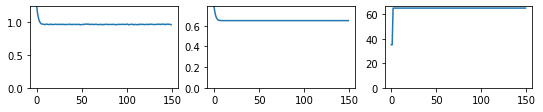

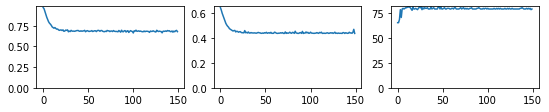

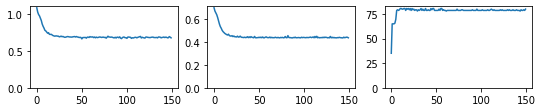

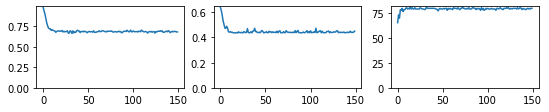

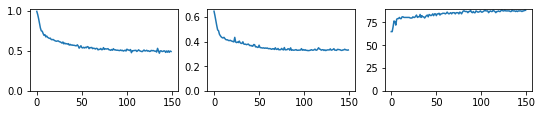

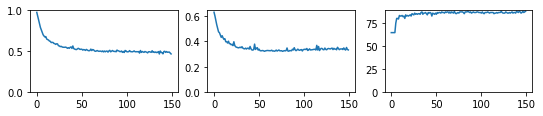

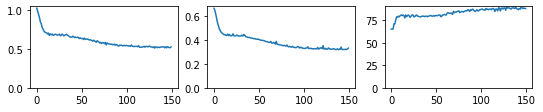

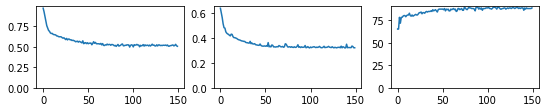

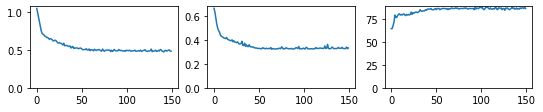

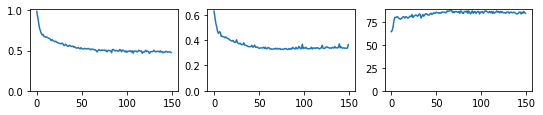

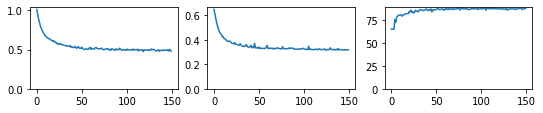

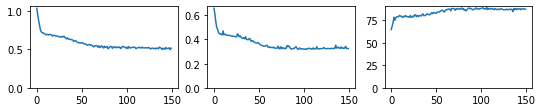

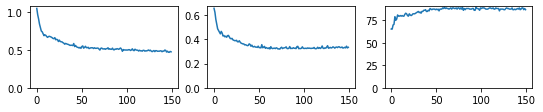

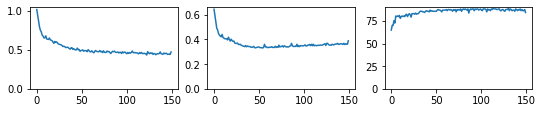

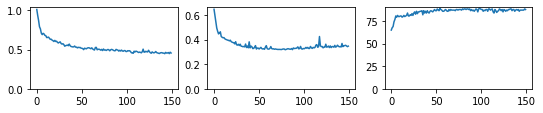

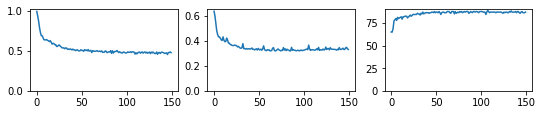

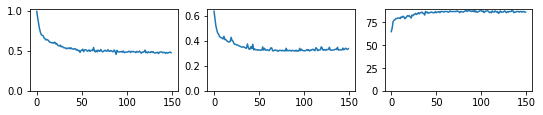

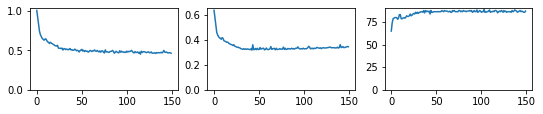

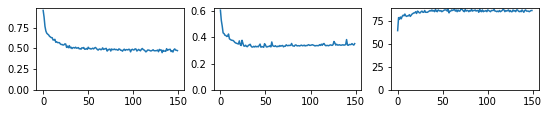

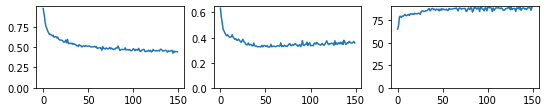

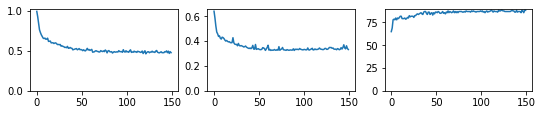

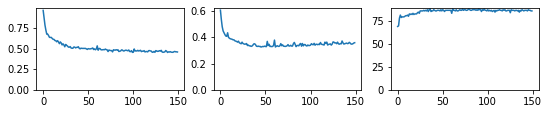

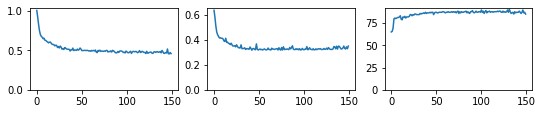

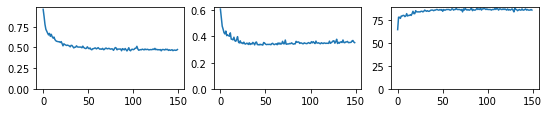

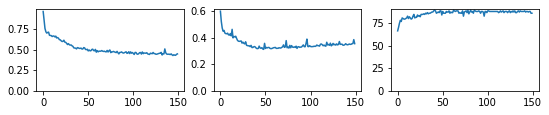

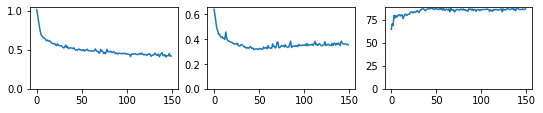

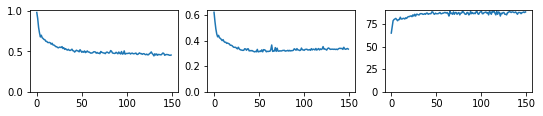

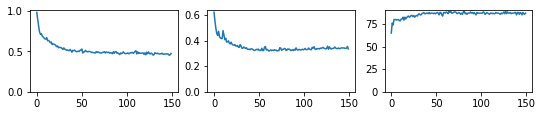

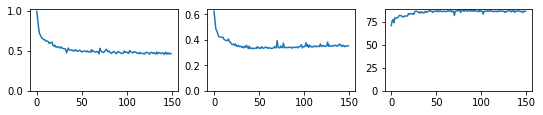

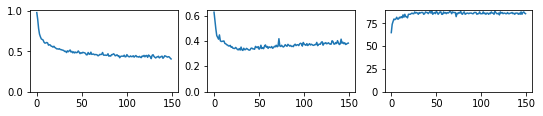

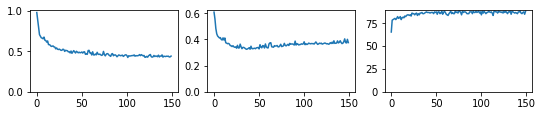

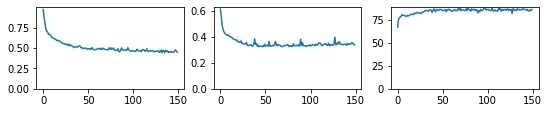

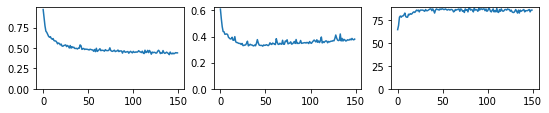

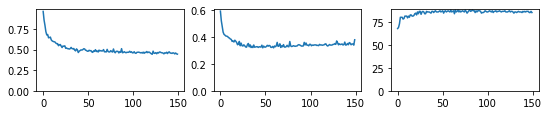

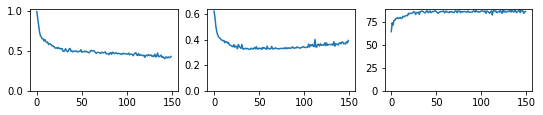

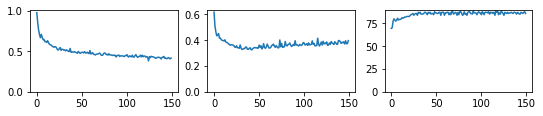

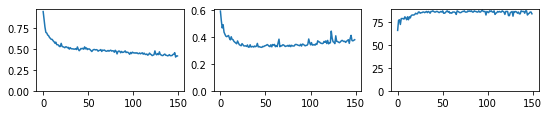

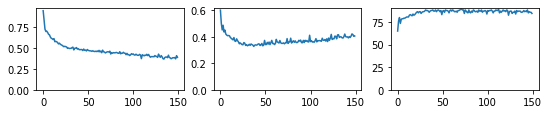

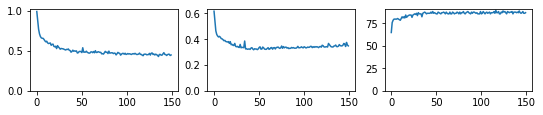

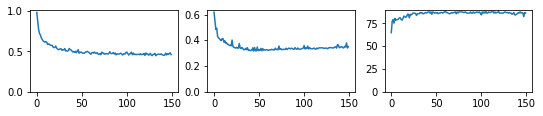

In [56]:
## training parameters
epochs=150
batch_size = 20
## model
n_samples = 40
D_hidden = np.linspace(1, n_samples, n_samples)
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
for i in range(n_samples):
    D_hidden1 = int(D_hidden[i])
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(),lr=0.01)
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

A acurácia max é 90.25974025974025 quando temos  22  neurônios na camada intermediaria


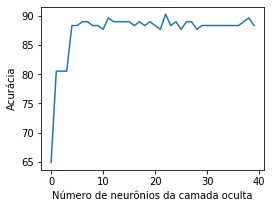

In [57]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(Max_Ac)
plt.xlabel("Número de neurônios da camada oculta")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", np.argmax(Max_Ac), " neurônios na camada intermediaria")

A partir de 5 neuronios na camada oculta já atingimos uma suficiente complexidade do modelo para termos resultados próximos à 90%

---------- Best : 89.610  at epoch  90  /  150
---------- Best : 90.260  at epoch  19  /  150
---------- Best : 90.260  at epoch  69  /  150
---------- Best : 89.610  at epoch  34  /  150
---------- Best : 88.312  at epoch  34  /  150
---------- Best : 88.961  at epoch  112  /  150
---------- Best : 88.312  at epoch  45  /  150
---------- Best : 88.961  at epoch  48  /  150
---------- Best : 89.610  at epoch  84  /  150
---------- Best : 88.961  at epoch  42  /  150
---------- Best : 88.961  at epoch  48  /  150
---------- Best : 88.961  at epoch  78  /  150
---------- Best : 88.961  at epoch  47  /  150
---------- Best : 88.961  at epoch  51  /  150
---------- Best : 88.961  at epoch  99  /  150
---------- Best : 88.961  at epoch  42  /  150
---------- Best : 88.961  at epoch  114  /  150
---------- Best : 88.312  at epoch  47  /  150
---------- Best : 88.961  at epoch  124  /  150
---------- Best : 88.312  at epoch  87  /  150
---------- Best : 88.961  at epoch  130  /  150
---------

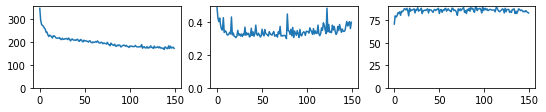

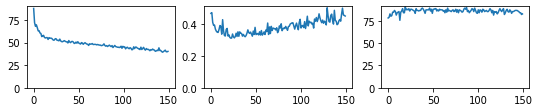

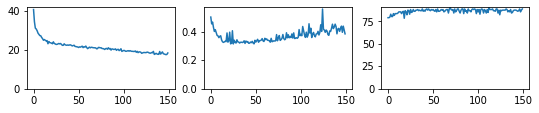

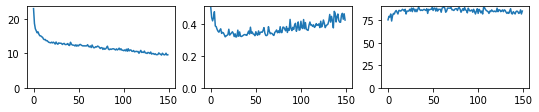

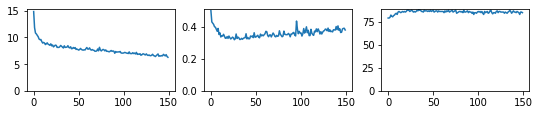

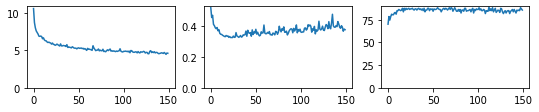

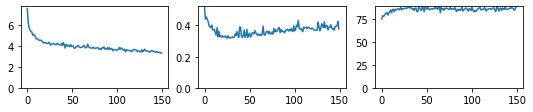

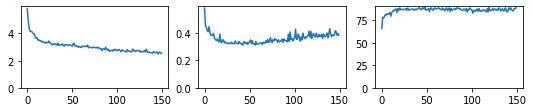

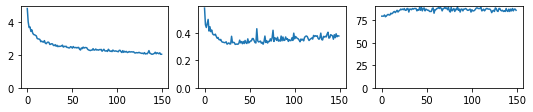

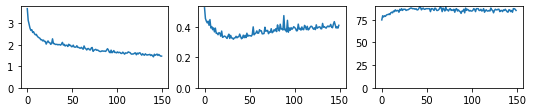

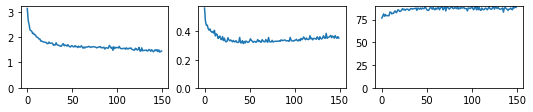

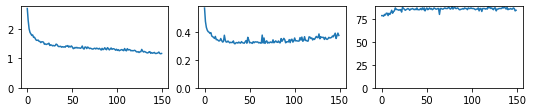

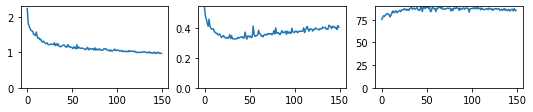

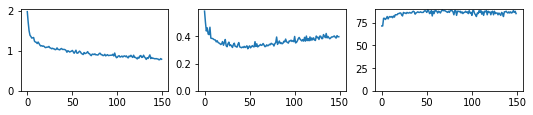

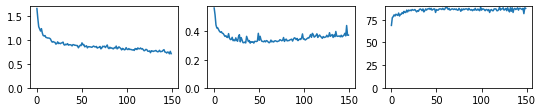

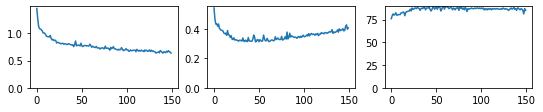

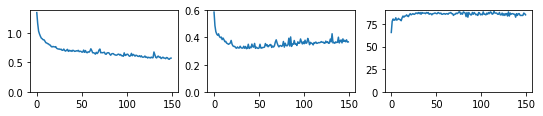

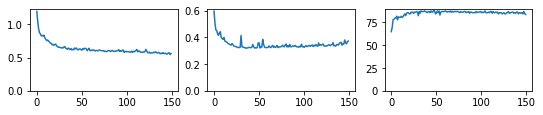

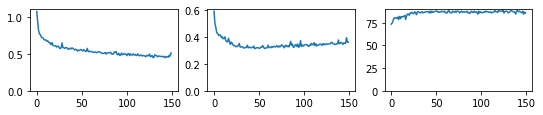

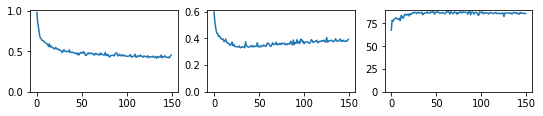

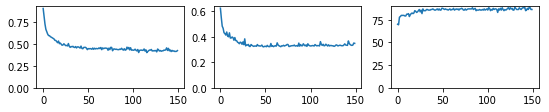

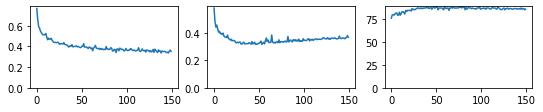

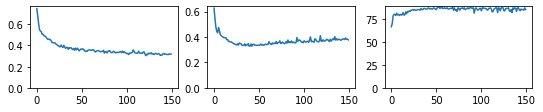

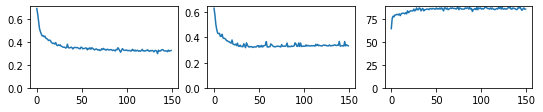

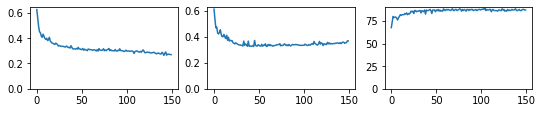

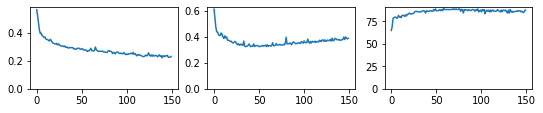

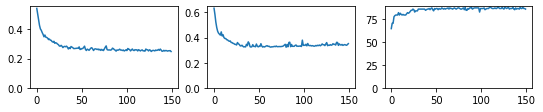

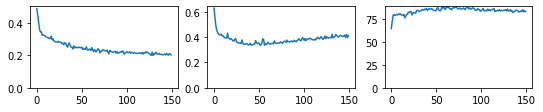

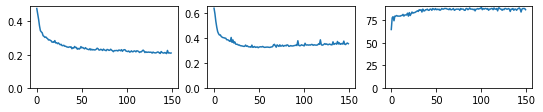

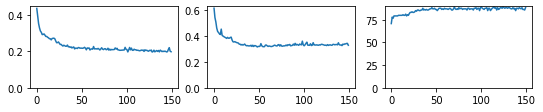

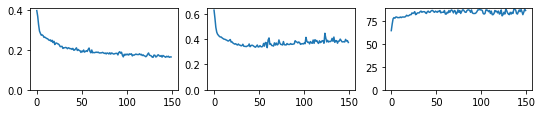

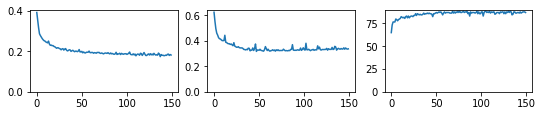

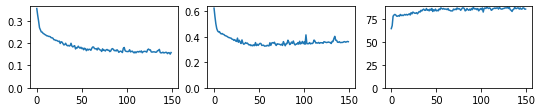

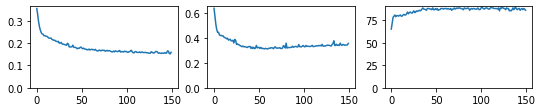

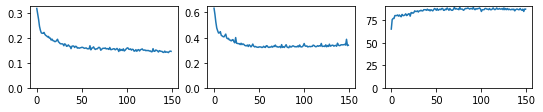

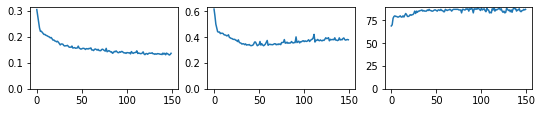

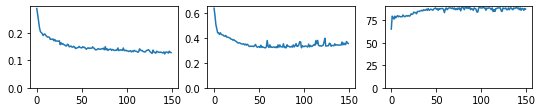

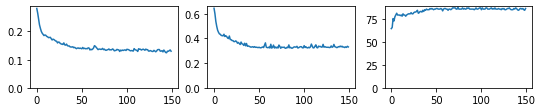

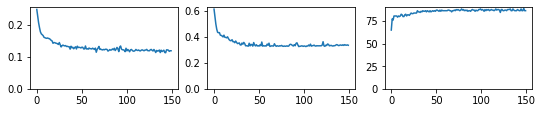

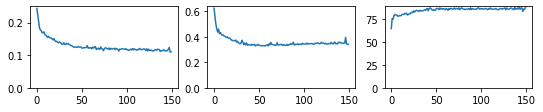

In [61]:
## training parameters
epochs=150
n_samples = 40
batch_size = np.linspace(1, n_samples, n_samples)
## model
D_hidden = np.linspace(1, n_samples, n_samples)
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
D_hidden = 22
for i in range(n_samples):
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(),lr=0.01)
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,int(batch_size[i]),X_train,y_train,X_test,y_test)

A acurácia max é 90.25974025974025 quando temos  1  batch_size


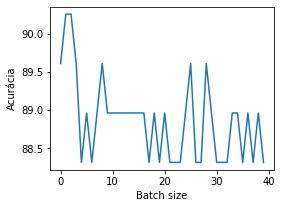

In [63]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(Max_Ac)
plt.xlabel("Batch size")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos ", np.argmax(Max_Ac)+, " batch_size")

---------- Best : 87.013  at epoch  99  /  150
---------- Best : 89.610  at epoch  21  /  150
---------- Best : 89.610  at epoch  62  /  150
---------- Best : 64.935  at epoch  0  /  150
---------- Best : 89.610  at epoch  121  /  150
---------- Best : 89.610  at epoch  103  /  150
---------- Best : 90.909  at epoch  103  /  150
---------- Best : 88.961  at epoch  76  /  150
---------- Best : 88.961  at epoch  24  /  150
---------- Best : 89.610  at epoch  85  /  150
---------- Best : 81.169  at epoch  76  /  150
---------- Best : 90.260  at epoch  108  /  150
---------- Best : 89.610  at epoch  47  /  150
---------- Best : 88.961  at epoch  28  /  150
---------- Best : 89.610  at epoch  31  /  150
---------- Best : 90.909  at epoch  83  /  150
---------- Best : 88.961  at epoch  23  /  150
---------- Best : 89.610  at epoch  74  /  150
---------- Best : 89.610  at epoch  94  /  150
---------- Best : 89.610  at epoch  128  /  150
---------- Best : 88.312  at epoch  30  /  150
---------

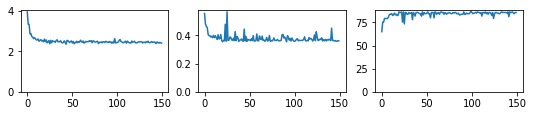

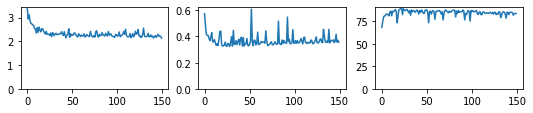

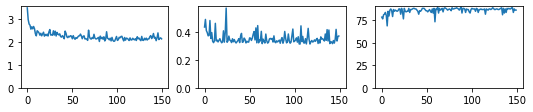

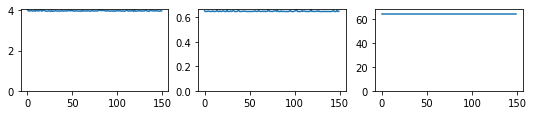

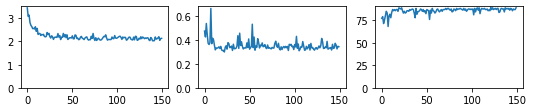

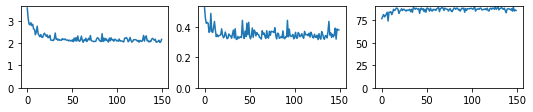

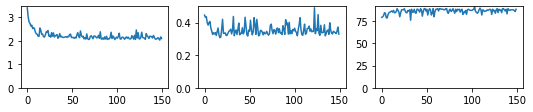

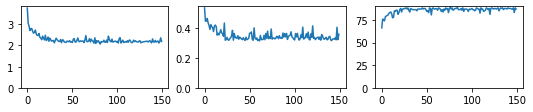

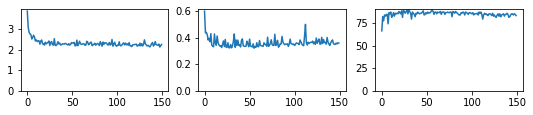

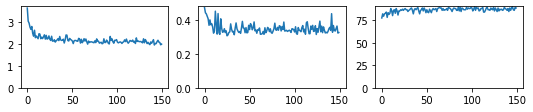

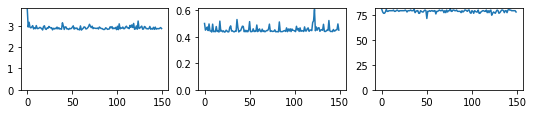

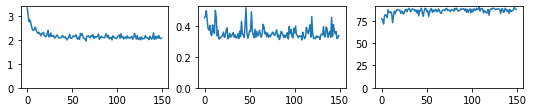

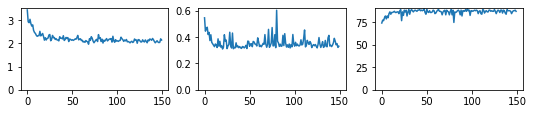

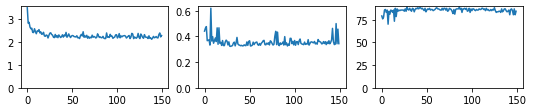

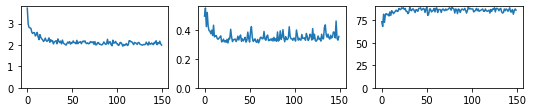

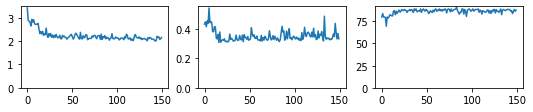

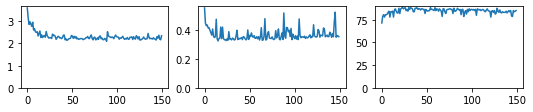

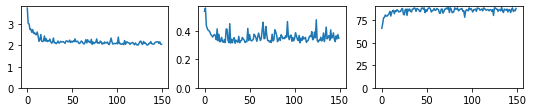

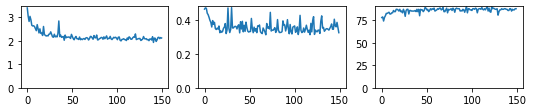

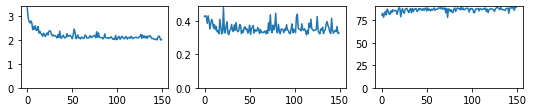

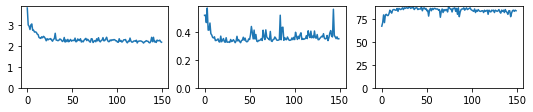

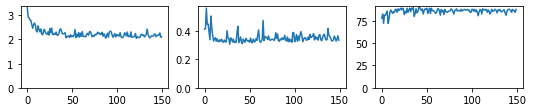

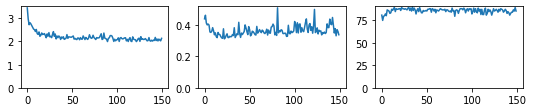

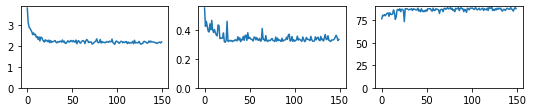

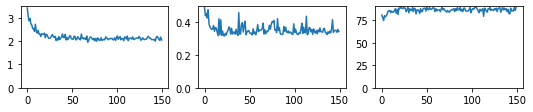

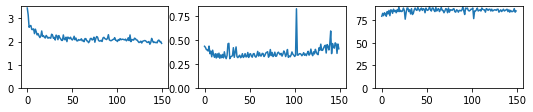

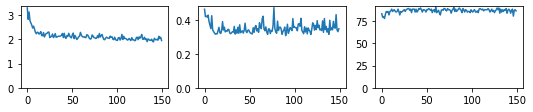

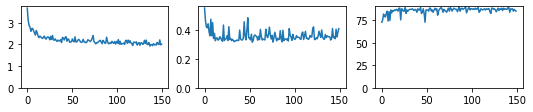

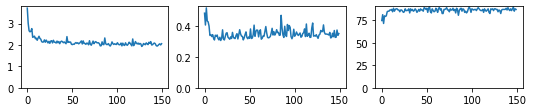

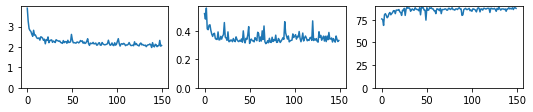

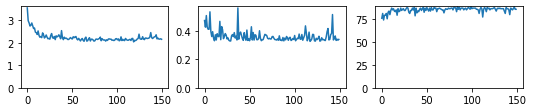

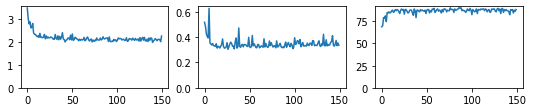

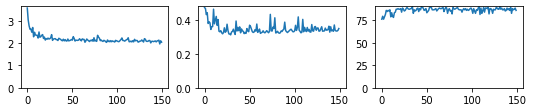

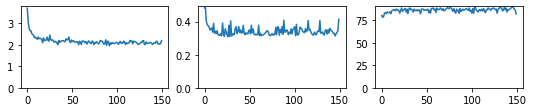

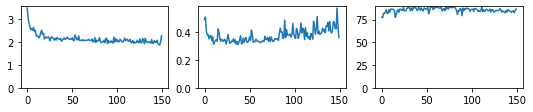

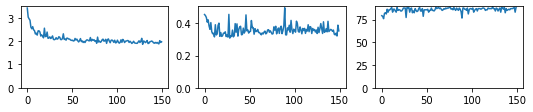

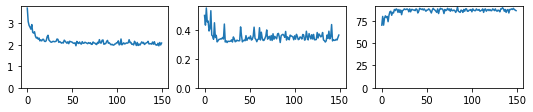

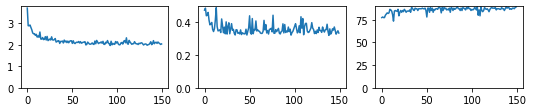

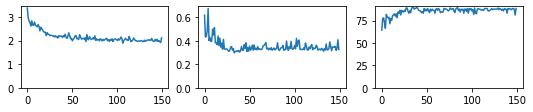

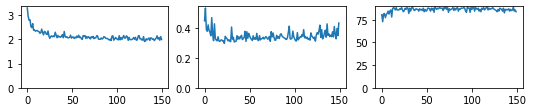

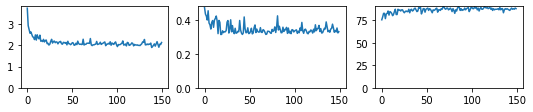

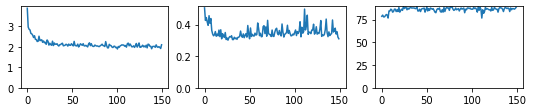

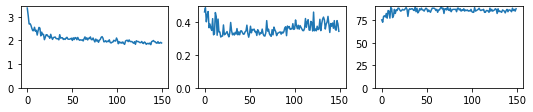

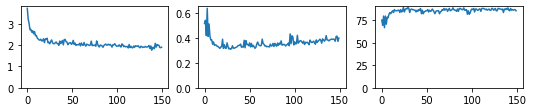

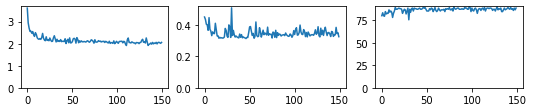

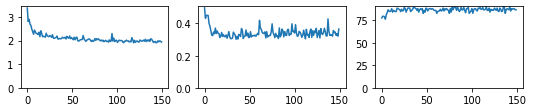

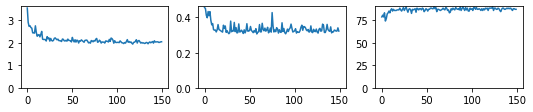

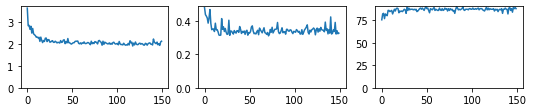

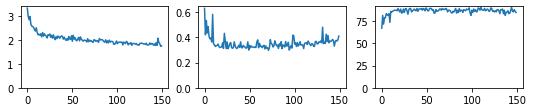

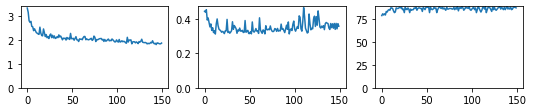

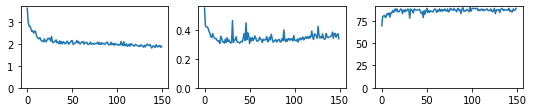

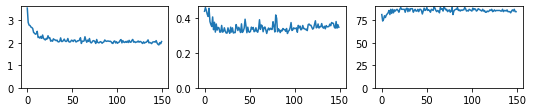

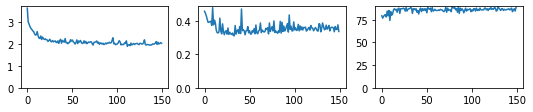

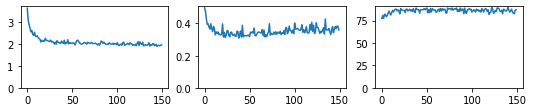

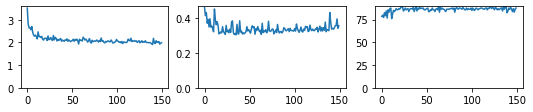

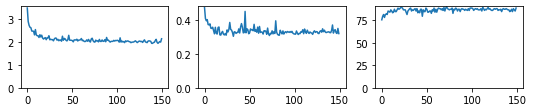

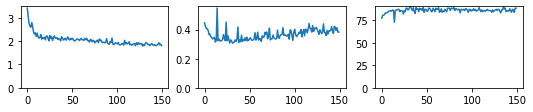

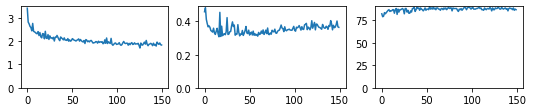

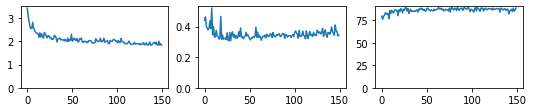

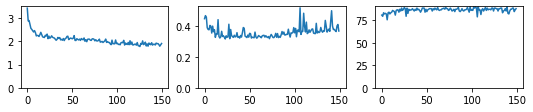

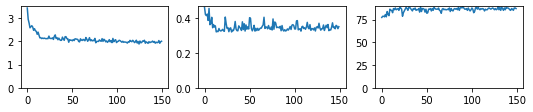

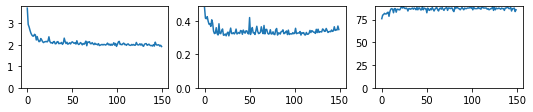

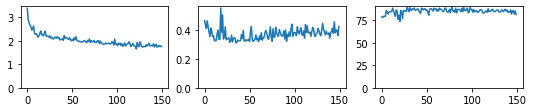

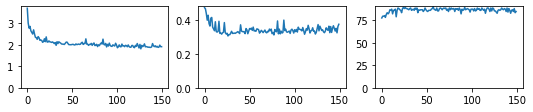

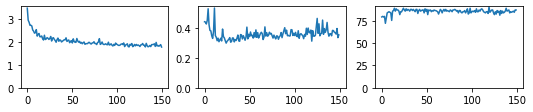

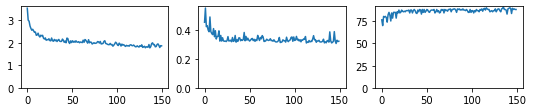

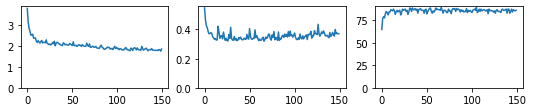

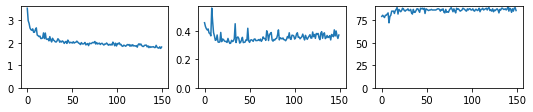

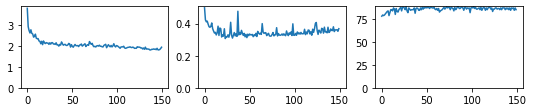

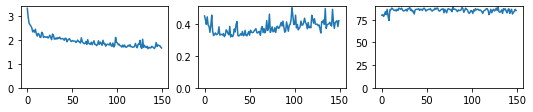

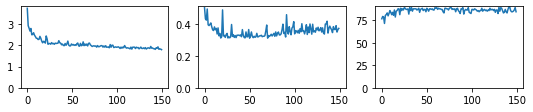

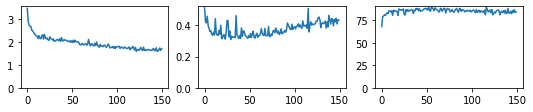

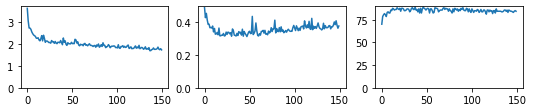

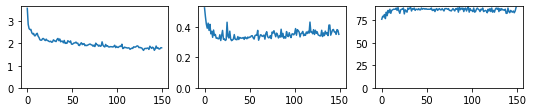

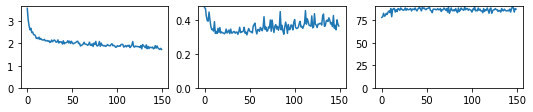

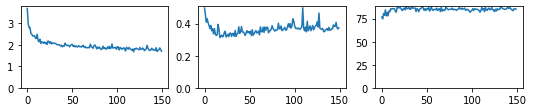

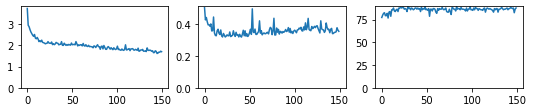

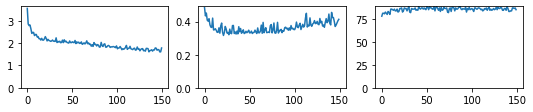

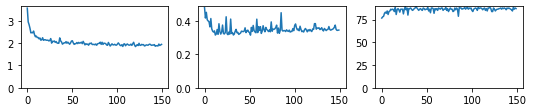

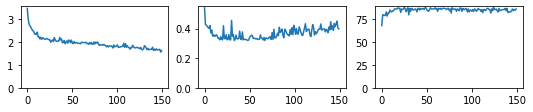

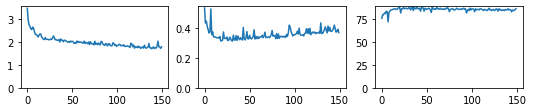

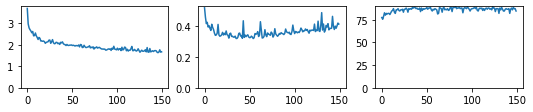

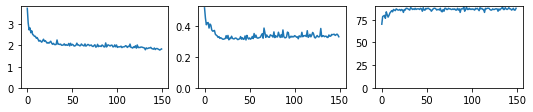

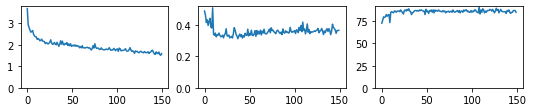

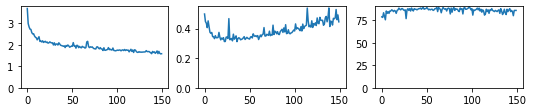

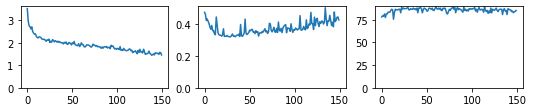

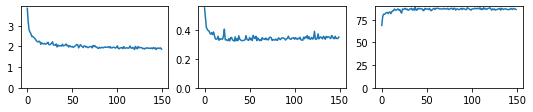

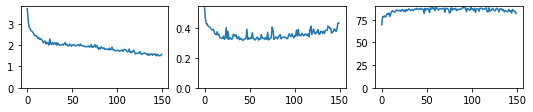

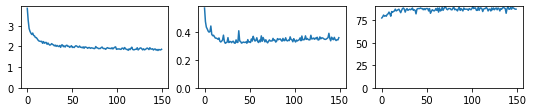

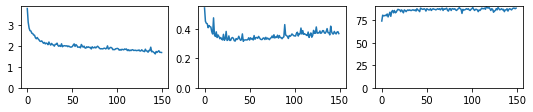

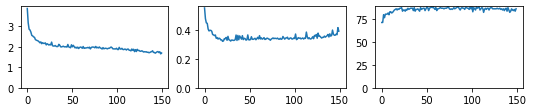

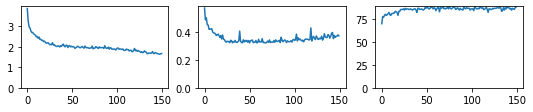

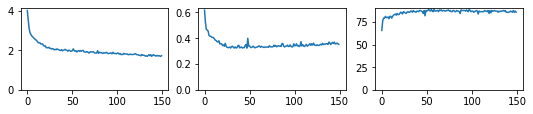

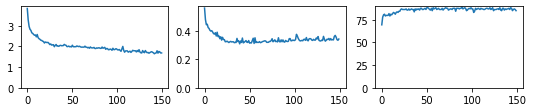

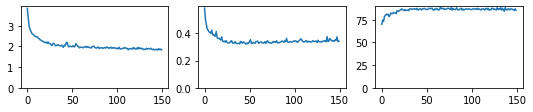

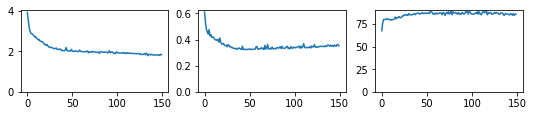

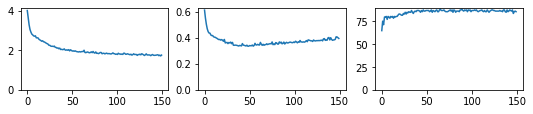

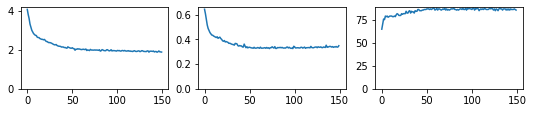

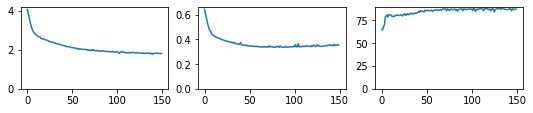

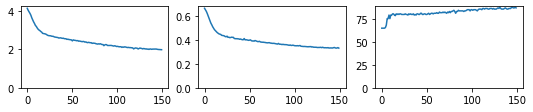

In [67]:
## training parameters
epochs=150
batch_size = 10
n_samples = 100
lrate = np.linspace(0.1, 0.001, n_samples)
## model
Max_Ac = np.zeros(n_samples)
D_in = 8
D_out= 1
D_hidden = 22
for i in range(n_samples):
    model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                        nn.ReLU(),
                        nn.Linear(D_hidden1,D_out),
                        nn.Sigmoid())
    optimizer=th.optim.Adam(model.parameters(), lr = lrate[i])
    loss_fn=nn.BCELoss()
    labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

A acurácia max é 90.9090909090909 quando temos lr =  0.094


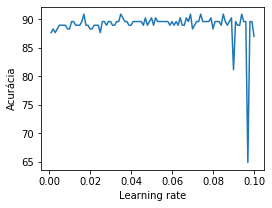

In [70]:
plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
plt.plot(lrate, Max_Ac)
plt.xlabel("Learning rate")
plt.ylabel("Acurácia")
print("A acurácia max é", np.max(Max_Ac), "quando temos lr = ", lrate[np.argmax(Max_Ac)])

---------- Best : 88.961  at epoch  41  /  150


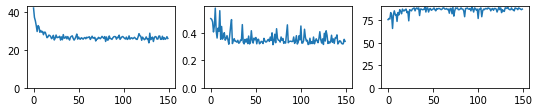

In [83]:
## best parameters
epochs=150
batch_size = 3
n_samples = 100
## model
D_in = 8
D_out= 1
D_hidden = 22
model = nn.Sequential(nn.Linear(D_in,D_hidden1),
                    nn.ReLU(),
                    nn.Linear(D_hidden1,D_out),
                    nn.Sigmoid())
optimizer=th.optim.Adam(model.parameters(), lr = 0.094)
loss_fn=nn.BCELoss()
labels, y_pred, Max_Ac[i] = train(model,optimizer,loss_fn,epochs,batch_size,X_train,y_train,X_test,y_test)

Note que a acurácia entre 87-90% está extremamente próxima (dado que acaba amostra de teste representa aproximadamente 1,5%). Deste modo, notamos que a variação do batch size e do learning rate não trouxe grandes mudanças p convergência do modelo. No caso do learning rate, isso pode significar que todos os minimos da função custo são bem proximos (então o passo do aprendizado não é mt importante). No caso do batch size, o aumento dele trouxe apenas um diminuição no tempo de treinamento do modelo 

In [84]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(labels,y_pred)
display(confusion_matrix)

array([[91,  9],
       [11, 43]], dtype=int64)